In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import Lambda

In [7]:
# Tải tập dữ liệu FashionMNIST và tạo DataLoader

# Thiết lập phép biến đổi ảnh (chuyển sang tensor)
transform_fn = ToTensor()

# Dữ liệu huấn luyện
train_dataset = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=transform_fn,
    download=True
)

# Dữ liệu kiểm thử
test_dataset = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=transform_fn,
    download=True
)

# Tạo DataLoader cho huấn luyện và kiểm thử
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64)


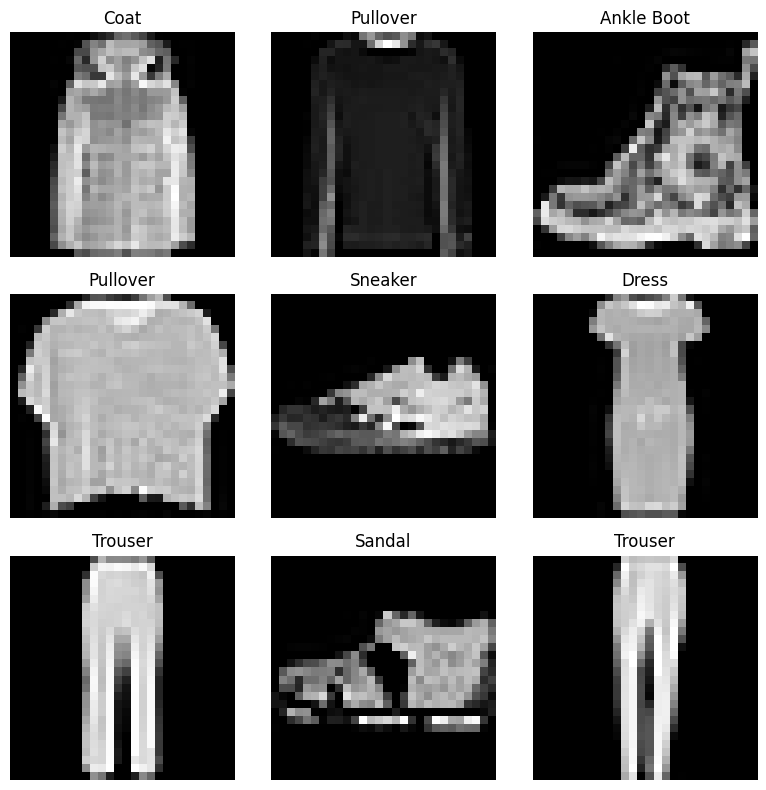

In [6]:
import torch
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Lấy 9 chỉ số ngẫu nhiên và xáo trộn thứ tự
indices = torch.randperm(len(training_data))[:cols * rows]

for i, idx in enumerate(indices, 1):
    img, label = training_data[idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.tight_layout()
plt.show()


In [9]:
import torch.nn as nn

# Định nghĩa mô hình mạng neural đơn giản cho FashionMNIST
class FashionNet(nn.Module):
    def __init__(self):
        super(FashionNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc_layers = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.fc_layers(x)
        return logits

# Khởi tạo model, hàm mất mát và bộ tối ưu
model = FashionNet()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [10]:
# Huấn luyện mô hình trong 5 epoch
num_epochs = 5

for ep in range(num_epochs):
    total_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Lan truyền xuôi
        preds = model(X_batch)
        loss_val = loss_fn(preds, y_batch)

        # Lan truyền ngược & cập nhật trọng số
        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        total_loss += loss_val.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {ep + 1}/{num_epochs} | Average Loss: {avg_loss:.4f}")


Epoch 1/5 | Average Loss: 1.1470
Epoch 2/5 | Average Loss: 0.6708
Epoch 3/5 | Average Loss: 0.5748
Epoch 4/5 | Average Loss: 0.5283
Epoch 5/5 | Average Loss: 0.4999


In [11]:
# Đánh giá độ chính xác trên tập kiểm thử
model.eval()  # Chuyển sang chế độ đánh giá

num_correct = 0
num_samples = 0

with torch.inference_mode():  # tương đương torch.no_grad(), nhưng rõ nghĩa hơn
    for X_test, y_test in test_loader:
        logits = model(X_test)
        predictions = logits.argmax(dim=1)

        num_samples += y_test.size(0)
        num_correct += (predictions == y_test).sum().item()

accuracy = (num_correct / num_samples) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 81.39%


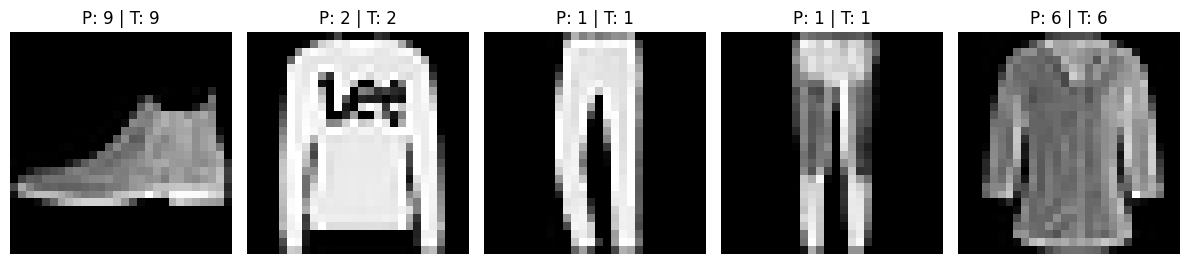

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Lấy một batch dữ liệu từ test_loader
batch = next(iter(test_loader))
X_sample, y_true = batch

# Dự đoán với mô hình
model.eval()
with torch.inference_mode():
    y_pred = model(X_sample).argmax(dim=1)

# Hiển thị 5 ảnh đầu tiên cùng nhãn dự đoán và nhãn thật
fig, ax_arr = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
for idx, ax in enumerate(ax_arr):
    ax.imshow(X_sample[idx].squeeze(), cmap="gray")
    ax.set_title(f"P: {y_pred[idx].item()} | T: {y_true[idx].item()}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [14]:
# ===== Lưu mô hình đã huấn luyện =====
save_path = "fashion_model.pth"
torch.save(model.state_dict(), save_path)
print(f"✅ Model saved to {save_path}")

# ===== Tải lại mô hình đã lưu =====
restored_model = FashionNet()
state_dict = torch.load(save_path)

restored_model.load_state_dict(state_dict)
restored_model.eval()

print("✅ Model loaded and set to evaluation mode.")


✅ Model saved to fashion_model.pth
✅ Model loaded and set to evaluation mode.
